In [23]:
#######################
# Import dependencies #
#######################
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

##################################
# Load Arcadia-specific packages #
##################################
import sys
sys.path.append('../')

import ProteinCartography as PC
import arcadia_pycolor as apc

apc.mpl_setup()

########################
# Set global variables #
########################
output_dir = 'pub_cluster_quality'

# create output directory if it doesn't already exist
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

In [65]:
results_folders = ['ADA1A_Kira', 'cki-1_Matus', 'GFP_Cameron', 'SHS1_Galo', 'Tse1_Atanas']
simm_files_prefix = [os.path.join('../', folder, 'output', 'clusteringresults', f'{folder.split("_")[0]}') for folder in results_folders]

leiden_diag_means = []
leiden_nclust = []
sc_diag_means = []
sc_nclust = []

for pre in simm_files_prefix:
    leiden_df = pd.read_csv(f'{pre}_leiden_similarity.tsv', sep = '\t', index_col = 'LeidenCluster')
    leiden_diag = np.diagonal(leiden_df)
    leiden_diag_mean = np.mean(leiden_diag)
    
    leiden_nclust.append(len(leiden_diag))
    leiden_diag_means.append(leiden_diag_mean)
    
    sc_df = pd.read_csv(f'{pre}_strucluster_similarity.tsv', sep = '\t', index_col = 'StruCluster')
    sc_diag = np.diagonal(sc_df)
    sc_diag_mean = np.mean(sc_diag)
    
    sc_nclust.append(len(sc_diag))
    sc_diag_means.append(sc_diag_mean)
    
means_df = pd.DataFrame({'Leiden': leiden_diag_means, 'Structural': sc_diag_means}, index = results_folders)
nclust_df = pd.DataFrame({'Leiden': leiden_nclust, 'Structural': sc_nclust}, index = results_folders)

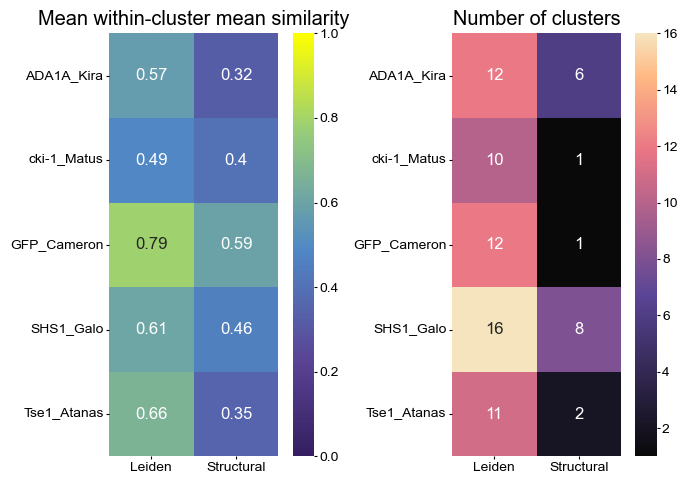

In [71]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (7, 5))
fig.subplots_adjust(wspace=0.01)

sns.heatmap(means_df, cmap = 'arcadia:viridis', ax = ax1, vmin = 0, vmax = 1, annot = True, square = True)
ax1.title.set_text('Mean within-cluster mean similarity')

sns.heatmap(nclust_df, cmap = 'arcadia:magma', ax = ax2, annot = True, square = True)
ax2.title.set_text('Number of clusters')

plt.tight_layout()

plt.savefig('cluster_diagonal_comparison.png')

In [ ]:
plddt_gradient_dict = {
    'color_dict': apc.dragon | apc.amber | apc.canary | apc.vitalblue | {'arcadia:cobalt': '#4A72B0'},
    'values': [0, 0.25, 0.6, 0.8, 1]
}

# instantiate a new Gradient object
plddt_gradient = apc.Gradient(
    name = 'plddt_gradient',
    color_dict = plddt_gradient_dict['color_dict'], 
    values = plddt_gradient_dict['values']
)

plddt_gradient.mpl_LinearSegmentedColormap_register()

conf_df = metrics_df[~metrics_df['gene'].isna()].sort_values('Leiden_mean', ascending = False)[['pdb_confidence', 'gene']]
conf_df.index = conf_df['gene']
conf_df.drop(columns = ['gene'], inplace = True)

fig = plt.figure(figsize = (4, 16))

ax = sns.heatmap(conf_df, cmap = 'plddt_gradient', vmin = 0, vmax = 100, annot = True, square = True, cbar_kws = dict(use_gridspec=False,location="top", shrink = 0.3, aspect = 5))
ax.title.set_text('Cluster compactness')

plt.savefig('sorted_pdb_confidence.svg')